# Case Study - We are going to analyse and predict the data of the hourly vehicle counts of particular highway in the year of 1995 beginning from the month of August.

#### Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing,seasonal_decompose,SimpleExpSmoothing
from sklearn.metrics import mean_absolute_percentage_error

## 1. Read the data as an hourly Time Series from the '.csv' file and plot the Time Series data.

In [3]:
df=pd.read_csv('Vehicle.csv',parse_dates=True,index_col='Hour')
df.head()

,Vehicles
Hour,
1,699
2,346
3,193
4,191
5,193


In [37]:
len(df)

1689

## 2. Check the basic measures of descriptive statistics of the Time Series. Also, check how many days of data do we have and plot the Time Series with the mean and median of the Time Series.

In [4]:
df.describe()

,Vehicles
count,1689.000000
mean,2060.417999
std,1339.545842
min,154.000000
25%,851.000000
50%,2262.000000
75%,2924.000000
max,5549.000000


In [5]:
df.shape

(1689, 1)

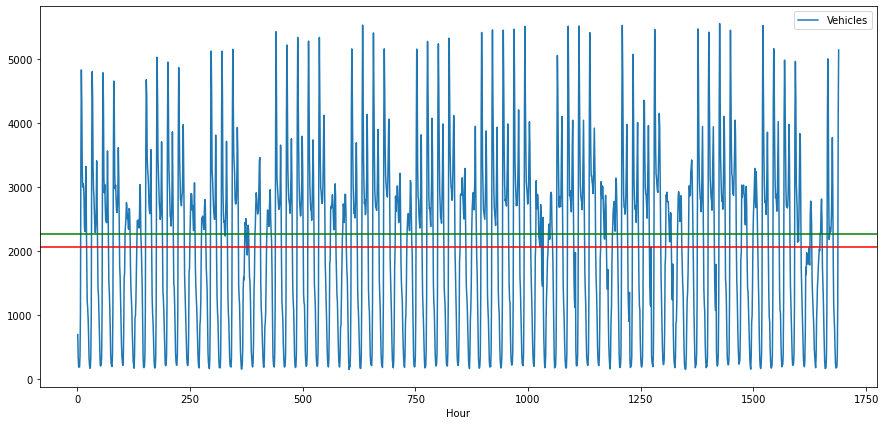

In [16]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df)
plt.axhline(df['Vehicles'].mean(),color='red')
plt.axhline(df['Vehicles'].median(),color='green')
plt.show()

## 3. Decompose the Time Series to understand the various components.

In [25]:
decomp=seasonal_decompose(df,model='additive',period=12)


In [26]:
decomp.trend

Hour
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
        ..
1685   NaN
1686   NaN
1687   NaN
1688   NaN
1689   NaN
Name: trend, Length: 1689, dtype: float64

In [28]:
decomp.seasonal

Hour
1       -224.105287
2       -465.229692
3       -596.545168
4       -675.022547
5       -618.288434
           ...     
1685    -618.288434
1686    -384.333997
1687     205.865249
1688    1022.928046
1689    1085.289951
Name: seasonal, Length: 1689, dtype: float64

In [29]:
decomp.resid

Hour
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
        ..
1685   NaN
1686   NaN
1687   NaN
1688   NaN
1689   NaN
Name: resid, Length: 1689, dtype: float64

<Figure size 1080x504 with 0 Axes>

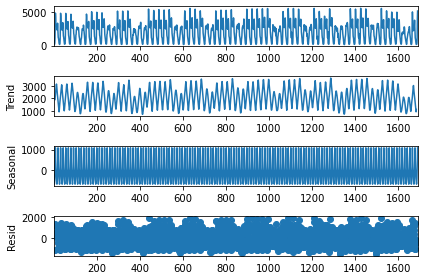

In [31]:
plt.figure(figsize=(15,7))
decomp.plot()
plt.show()

In [33]:
decomp=seasonal_decompose(df,model='multiplicative',period=12)


<Figure size 1080x504 with 0 Axes>

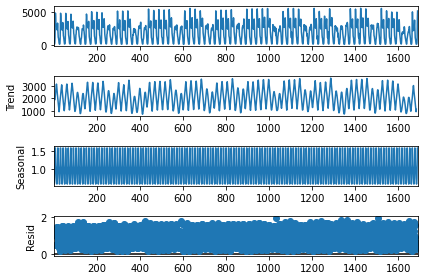

In [34]:
plt.figure(figsize=(15,7))
decomp.plot()
plt.show()

## 4. Split the data into train and test and plot the training and test data.

In [43]:
train=df[1:1550]
test=df[1550:]

In [44]:
train.tail()

,Vehicles
Hour,
1546,4642
1547,3694
1548,3110
1549,2833
1550,2890


In [45]:
test.head()

,Vehicles
Hour,
1551,2771
1552,2623
1553,2831
1554,3458
1555,4021


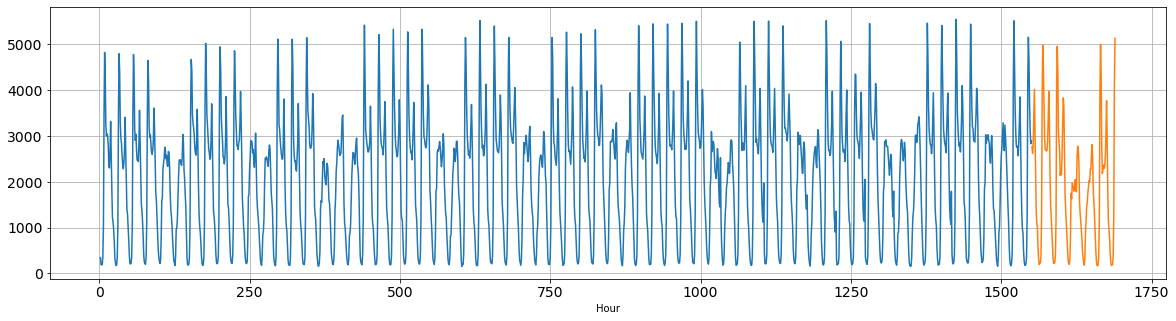

In [53]:
plt.figure(figsize=(20,5))
train['Vehicles'].plot(fontsize=14)
test['Vehicles'].plot(fontsize=14)
plt.grid()
#plt.legend([train['Vehicles'],test['Vehicles']])
plt.show()

## Model 1: Build a Linear Regression using the Time Stamped order of occurence of the vehicle count.

In [60]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+1550 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

In [61]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Vehicles,time
Hour,,
2,346,1
3,193,2
4,191,3
5,193,4
6,355,5


Last few rows of Training Data


,Vehicles,time
Hour,,
1546,4642,1545
1547,3694,1546
1548,3110,1547
1549,2833,1548
1550,2890,1549


First few rows of Test Data


,Vehicles,time
Hour,,
1551,2771,1550
1552,2623,1551
1553,2831,1552
1554,3458,1553
1555,4021,1554


Last few rows of Test Data


,Vehicles,time
Hour,,
1685,194,1684
1686,373,1685
1687,1218,1686
1688,4076,1687
1689,5137,1688


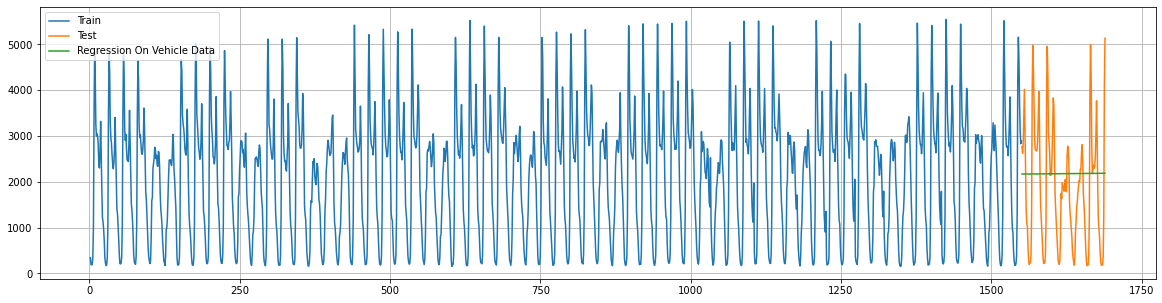

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Vehicles'])

train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegVehicle'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegVehicle'] = test_predictions_model1

plt.figure(figsize=(20,5))
plt.plot( train['Vehicles'], label='Train')
plt.plot(test['Vehicles'], label='Test')
plt.plot(LinearRegression_test['RegVehicle'], label='Regression On Vehicle Data')

plt.legend(loc='best')
plt.grid();

## Evaluate this model on the test data using Root Mean Squared Error (RMSE).

In [70]:
from sklearn import metrics
print(metrics.mean_squared_error(test['Vehicles'],test_predictions_model1,squared=False))

1330.3557209984428


## Model 2: Build a Simple Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE.

Text(0.5, 1.0, 'Alpha = 0.99 Predictions')

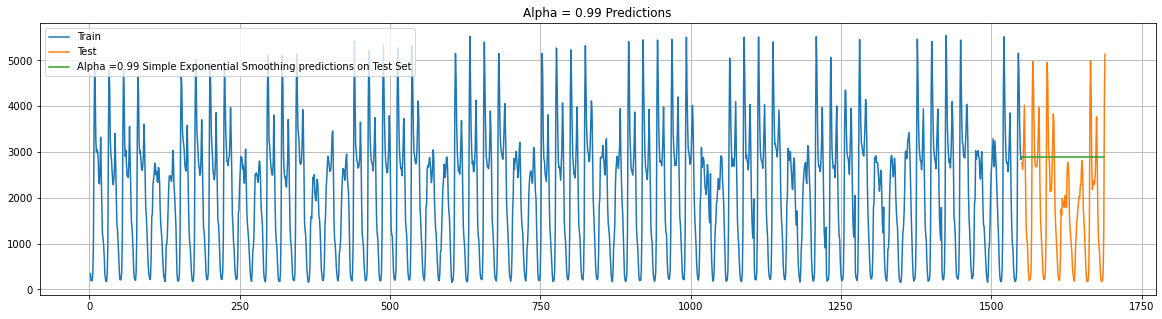

In [73]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

plt.figure(figsize=(20,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions')


In [78]:
print('SES RMSE:',metrics.mean_squared_error(test.values,SES_predict.values,squared=False))


SES RMSE: 1645.2340144875732


## Model 3: Build a Double Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE.


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.995, 'smoothing_trend': 0.995, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': -1135.8666666666659, 'initial_trend': 536.2121212121212, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


Text(0.5, 1.0, 'Simple and Double Exponential Smoothing Predictions')

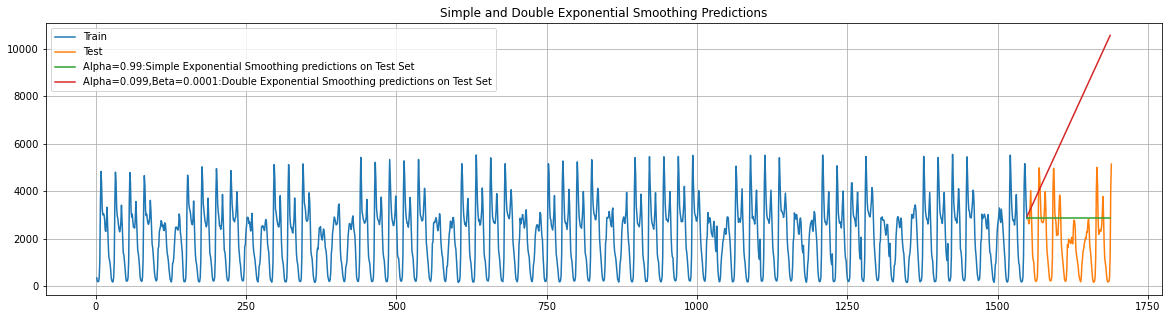

In [79]:
model_DES = Holt(train,initialization_method='estimated')
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)

DES_predict =  model_DES.forecast(len(test))
DES_predict

plt.figure(figsize=(20,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions')

In [80]:
print('DES RMSE:',metrics.mean_squared_error(test.values,DES_predict.values,squared=False))


DES RMSE: 5583.907784513777


## Model 4: Build a Triple Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE.

In [ ]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

TES_predict =  model_TES.forecast(len(test))
TES_predict

plt.figure(figsize=(20,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions')
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))


## Which model performs the best?

In [ ]:
Holt- Winter model performs the best

Tweak the different parameters for each of these models and try to come up with a better accuracy (less RMSE)

##### Note: You can go ahead and attempt the following questions now or wait until after the mentored learning session. During the mentor learning sessions, you will get clarity on how to solve the following questions.

## Model 5: Build a Simple Exponential Smoothing model by taking the best alpha [in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [ ]:
model_DES = Holt(train,initialization_method='estimated')
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)

DES_predict =  model_DES.forecast(len(test))
DES_predict

plt.figure(figsize=(20,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions')

## Model 6: Build a Double Exponential Smoothing model by taking the best alpha and beta [both in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [ ]:
model_DES = Holt(train,initialization_method='estimated')
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)

DES_predict =  model_DES.forecast(len(test))
DES_predict

plt.figure(figsize=(20,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions')

## Model 7: Build a Triple Exponential Smoothing model by taking the best alpha, beta and gamma [all in the range of 0.1 to 1 taking an interval of 0.1] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [ ]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

TES_predict =  model_TES.forecast(len(test))
TES_predict

plt.figure(figsize=(20,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions')
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))


## Which model performs the best?

In [ ]:
Holt-Winter model performs best

Try to play around with the parameters of the models to get a better accuracy score i.e. a lower RMSE on the test data.

Happy Learning!

# END